In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 7: Cosine Distance

In mathematics, a **metric or distance function** is a function that defines a distance between each pair of points.
The most used distance metrics are the Euclidean, the Manhattan, and the Cosine distances. 

**Euclidean distance:**

$$
d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}
$$

**Manhattan distance:**

$$
d(x,y) = \sqrt{\sum_{i=1}^n|x_i-y_i|}
$$

**Cosine distance:**

$$
d(x,y) = 1 + \dfrac{\sum_{i=1}^n x_iy_i}{\sqrt{\sum_{i=1}^n x_i^2}\sqrt{\sum_{i=1}^n y_i^2}}
$$

## Part 1

Write a k-means functions with cosine distance as the distance metric. 

In [31]:
def kmeans_cosine(X,k,max_iterations=1000):

    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initial means
    means = X[np.random.choice(m,k)] 
    # initial distances
    X_norms = np.linalg.norm(X,axis=1)[None,:]
    mean_norms = np.linalg.norm(means,axis=1)[:,None]
    distances = (X.dot(means)/X_norms)/means_norms + 1
    # initial clusters
    clusters = np.argmin(distances, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update distances
        X_norms = np.linalg.norm(X,axis=1)[None,:]
        mean_norms = np.linalg.norm(means,axis=1)[:,None]
        distances = (X.dot(means)/X_norms)/means_norms + 1
     
        # update clusters
        new_clusters = np.argmin(distances, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    
    results = {'clusters' : clusters, 'means' : means}

    return results

## Part 2

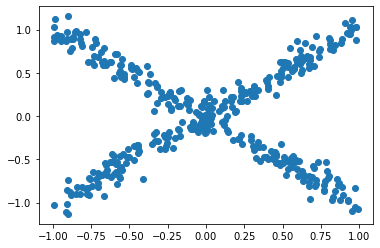

In [26]:
X = np.zeros((400,2))
X[0:200,0] = np.random.rand(200) + 0.0
X[200:400,0] = -np.random.rand(200) - 0.0
# cluster 1
X[0:100,1] = X[0:100,0] + 0.1*np.random.randn(100)
# cluster 2
X[100:200,1] = -X[100:200,0] + 0.1*np.random.randn(100)
# cluster 3
X[200:300,1] = X[200:300,0] + 0.1*np.random.randn(100)
# cluster 4
X[300:400,1] = -X[300:400,0] + 0.1*np.random.randn(100)

plt.plot(X[:,0],X[:,1],'o')

In [21]:
def kmeans(X,k,max_iterations=1000, return_inertia=False):
    
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k)] 
    distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
    clusters = np.argmin(distances, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        distances = np.sum(X**2,axis=1)[:,None]+np.sum(means**2,axis=1)[None,:]-2*X.dot(means.T)
        new_clusters = np.argmin(distances, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    
    results = {'clusters' : clusters, 'means' : means}
    # compute inertia
    if return_inertia:
        results['inertia'] = np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m
    
    return results

In [32]:
k = 4
results = kmeans_cosine(X,k)
clusters = results['clusters']

ValueError: shapes (400,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

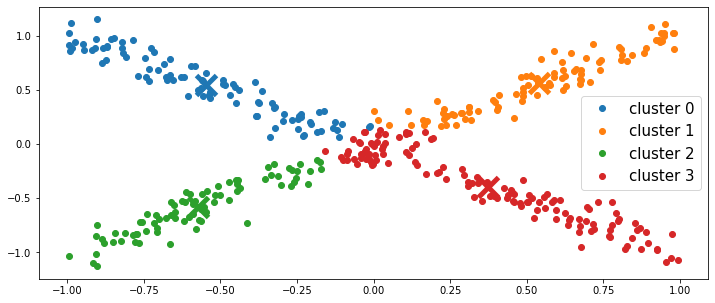

In [28]:
clusters = results['clusters']
means = results['means']
# plot clusters
colors = ['C0', 'C1', 'C2', 'C3']
plt.figure(figsize=(12,5))
for i in range(k):
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',label = 'cluster '+str(i), color = colors[i]) # cluster
    plt.plot(means[i,0],means[i,1],'x',color = colors[i],markersize=20,markeredgewidth=5)
plt.legend(fontsize=15)